# The Sparks Foundation Virtual Intenship 2022

# Data Science and Business Analytics

# Task 1: Prediction using supervised ML

# Predict the percentage of student based on the no. of study hours. What will be the predicted score if the student studies for 9.5 hrs/day?

# Author : Jibankrishna Patra

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

# Reading the data

In [3]:
link = "http://bit.ly/w-data"
df = pd.read_csv(link)

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
df.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Checking for null values

In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Checking for correlation between hours and scores

In [11]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


 # Visualizing the Dataset

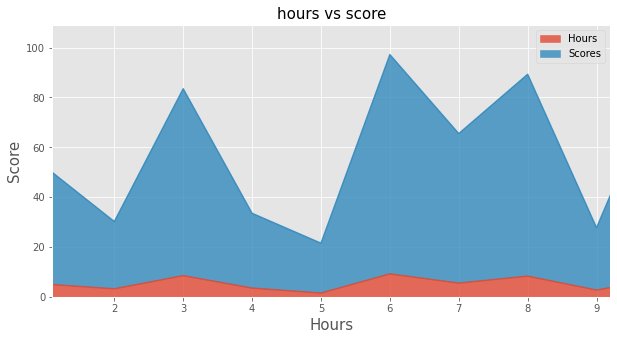

In [34]:
xmin=min(df.Hours)
xmax=max(df.Hours)
df.plot(xlim=(xmin,xmax),kind='area',alpha=0.8,stacked=True,figsize=(10,5))
plt.title('hours vs score', size=15)
plt.xlabel('Hours',size=15)
plt.ylabel('Score',size=15)
plt.show()

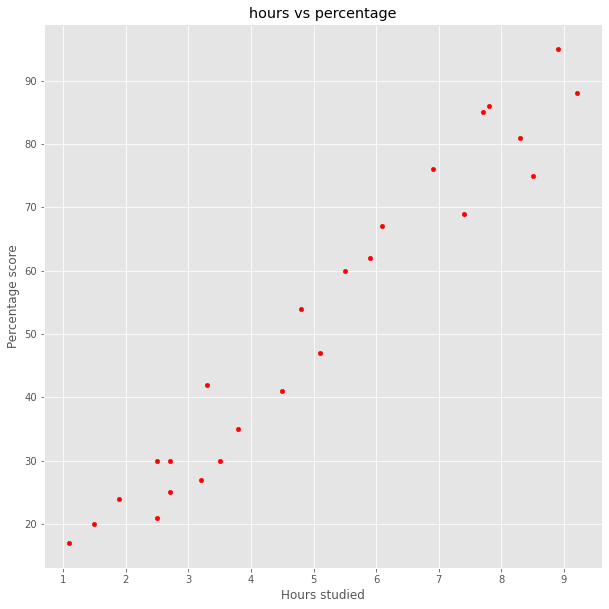

In [44]:
df.plot(figsize=(10,10),kind='scatter',x='Hours',y='Scores',color='r')
plt.title('hours vs percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

# Modelling the data

In [46]:
x=np.asanyarray(df[['Hours']])
y=np.asanyarray(df['Scores'])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print('training completed\n')
print('coefficients:',regressor.coef_)
print('intercept:',regressor.intercept_)


training completed

coefficients: [9.94061514]
intercept: 1.5079104828268726


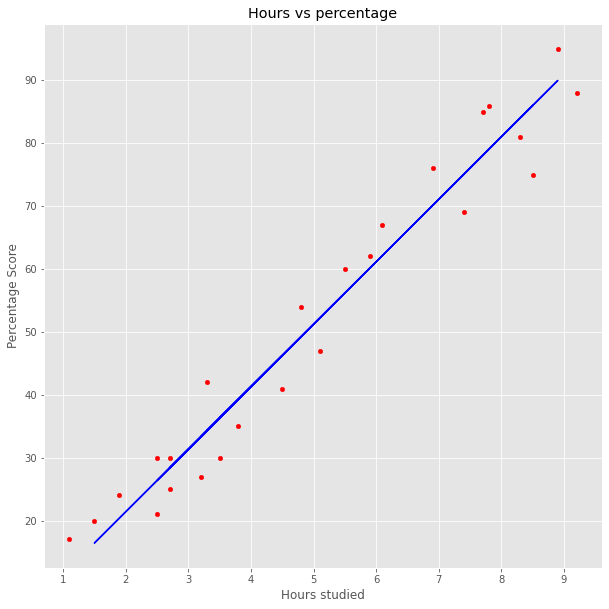

In [49]:
df.plot(figsize=(10,10),kind='scatter',x='Hours',y='Scores',color='r')
plt.plot(x_train,regressor.coef_[0]*x_train+regressor.intercept_,color='b')
plt.title('Hours vs percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

# Evaluating the Model


In [53]:
from sklearn import metrics
from sklearn.metrics import r2_score

pred=regressor.predict(x_test)
print('Mean Absolute Error:',format(metrics.mean_absolute_error(pred,y_test)))
print("R2-score:",r2_score(pred,y_test))

Mean Absolute Error: 4.877039354964484
R2-score: 0.9753240760240943


# Comparing the actual vs predicted

In [56]:
df2=pd.DataFrame({'Actual': y_test,'predicted':pred})
df2

,Actual,predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


# Predicting the Score

In [60]:
hours = 9.5
predicted_score = regressor.predict([[hours]])

print(f'No. of hours = {hours}')
print(f'Predicte Score = {predicted_score[0]}')

No. of hours = 9.5
Predicte Score = 95.94375434264262
